# Inferential Analysis Notebook

## Overview
The inferential analysis in this notebook will explore statistically significant relationships within the Utah real estate dataset. By performing hypothesis tests, we aim to determine the impact of key property attributes, such as the number of bedrooms, lot size, and presence of a garage, on listing prices. This analysis will help identify which features hold genuine predictive power and are not just coincidentally related to price, setting the stage for more accurate predictive modeling in the following steps.

## Inferential Analysis Questions
- Does the number of bedrooms significantly affect the listing price?
- Is there a significant difference in listing prices for properties built before vs. after 2000?
- Do properties with larger lot sizes (lot_sqft) command higher listing prices?
- Does having a garage significantly influence the listing price?
- Is there a significant difference in prices across different property types?


### Hypothesis Tests

In [43]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind


In [44]:
#Loading the Clean & Transformed Data
path = ('../data/cleaned_real_estate_utah.csv')
cleanedrs_data = pd.read_csv(path)

### Does the number of bedrooms significantly affect the listing price?

Hypotheses:

- Null Hypothesis (H0): The average listing price does not significantly differ between properties with different numbers of bedrooms.
- Alternate Hypothesis (H1): The average listing price differs significantly between properties with different numbers of bedrooms.

**Test:** We use an ANOVA (Analysis of Variance) test since we are comparing the mean prices across multiple groups (different bedroom counts).


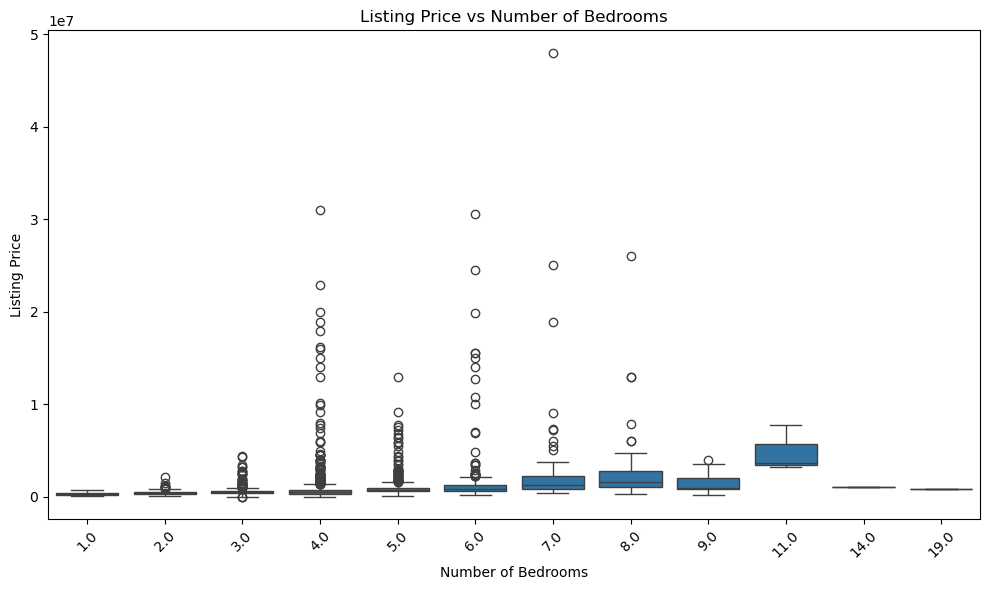

In [57]:
# Plotting the listing price against the number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='beds', y='listPrice', data=cleanedrs_data)
plt.title('Listing Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Listing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_89493/322939135.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=cleanedrs_data, x='beds', y='listPrice', ci="sd", palette="viridis")
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_89493/322939135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleanedrs_data, x='beds', y='listPrice', ci="sd", palette="viridis")


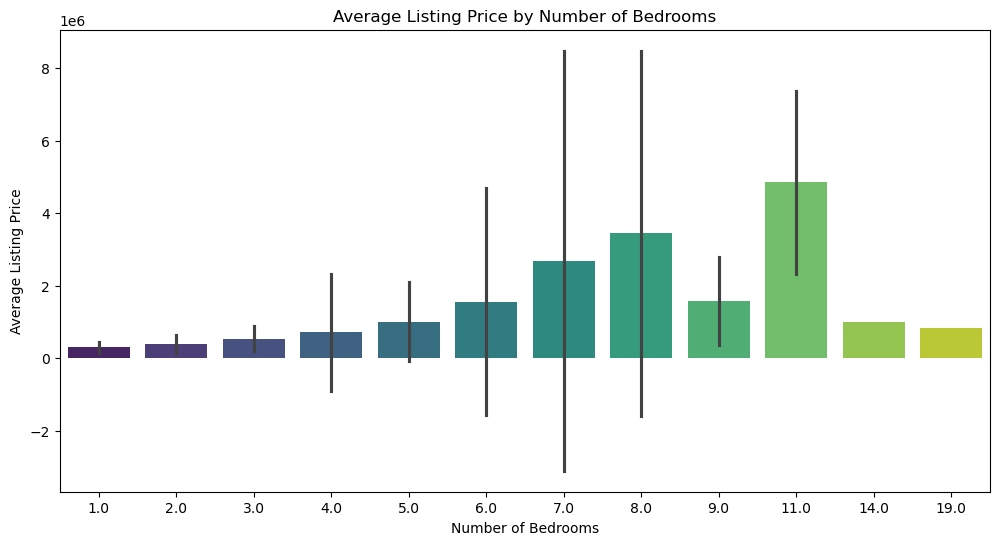

In [58]:
#Bar plot with Error Bars
plt.figure(figsize=(12, 6))
sns.barplot(data=cleanedrs_data, x='beds', y='listPrice', ci="sd", palette="viridis")
plt.title("Average Listing Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Listing Price")
plt.show()


A bar plot of the average listing price by bedroom count, with error bars representing confidence intervals, helps show whether different bedroom counts have overlapping price ranges, indicating significance or non-significance.

In [59]:
# Group prices by number of bedrooms
groups = [group["listPrice"].values for name, group in cleanedrs_data.groupby("beds")]

#Perform the ANOVA test to compare average prices across bedroom groups
stat, p_value = f_oneway(*groups)

#Results
print("ANOVA Test for Bedrooms and Listing Price:")
print("Statistic:", stat)
print("P-value:", p_value)

ANOVA Test for Bedrooms and Listing Price:
Statistic: 32.805150663059834
P-value: 9.227782941002127e-68


The bar plot shows clear variations in average listing prices across different bedroom counts. With a p-value of 9.23e-68, the ANOVA test indicates a statistically significant difference in listing prices across bedroom counts, meaning that the number of bedrooms does indeed affect listing price.

### Is There a Significant Difference in Listing Prices for Properties Built Before vs. After 2000?

Hypotheses:

- Null Hypothesis (H0): The average listing price for properties built before 2000 is not significantly different from properties built after 2000.
- Alternate Hypothesis (H1): The average listing price for properties built before 2000 is significantly different from properties built after 2000.

**Test:** Since we are comparing the mean prices between two independent groups (before and after 2000), a t-test is appropriate.

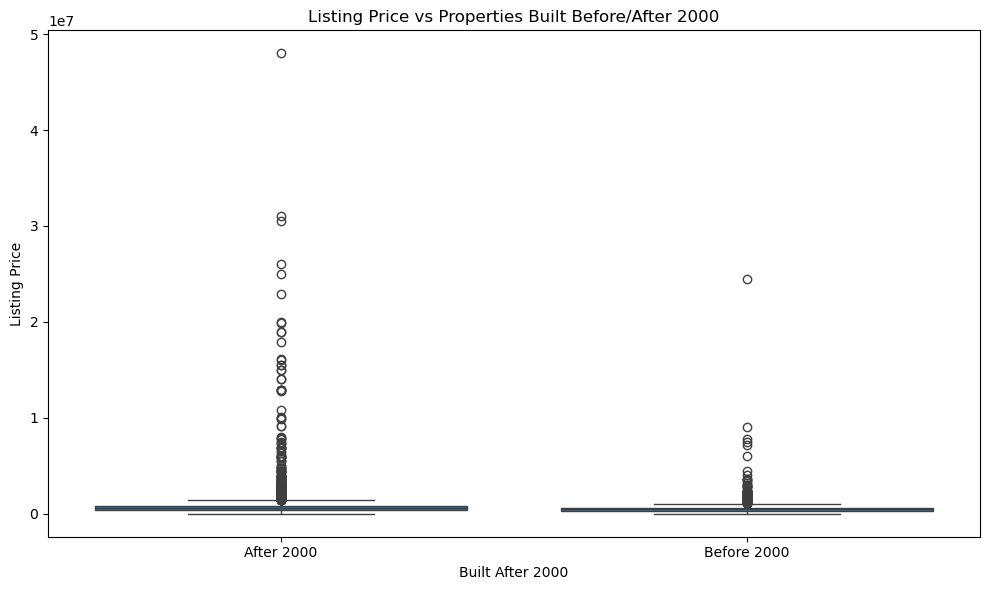

In [48]:
# Create a new column to categorize properties
cleanedrs_data['built_after_2000'] = cleanedrs_data['year_built'].apply(lambda x: 'Before 2000' if x < 2000 else 'After 2000')

# Plotting the listing price by property age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='built_after_2000', y='listPrice', data=cleanedrs_data)
plt.title('Listing Price vs Properties Built Before/After 2000')
plt.xlabel('Built After 2000')
plt.ylabel('Listing Price')
plt.tight_layout()
plt.show()

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_89493/4202638515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleanedrs_data, x='year_category', y='listPrice', palette="pastel")


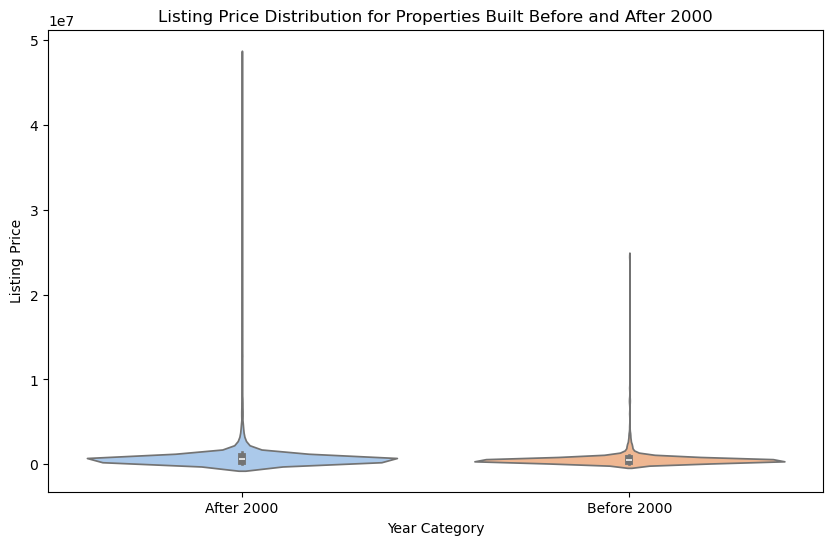

In [49]:
#Violin Plot
cleanedrs_data['year_category'] = cleanedrs_data['year_built'].apply(lambda x: 'Before 2000' if x < 2000 else 'After 2000')
plt.figure(figsize=(10, 6))
sns.violinplot(data=cleanedrs_data, x='year_category', y='listPrice', palette="pastel")
plt.title("Listing Price Distribution for Properties Built Before and After 2000")
plt.xlabel("Year Category")
plt.ylabel("Listing Price")
plt.show()

Violin plots provide a sense of the distribution of prices for properties built before and after 2000, giving insight into variance and central tendencies.

In [50]:
# Divide data into two groups: properties built before 2000 and properties built in or after 2000
before_2000 = cleanedrs_data[cleanedrs_data['year_built'] < 2000]['listPrice']
after_2000 = cleanedrs_data[cleanedrs_data['year_built'] >= 2000]['listPrice']

# Perform the t-test to compare average prices between the two groups
stat, p_value = ttest_ind(before_2000, after_2000)

#Results
print("T-test for Year Built and Listing Price:")
print("Statistic:", stat)
print("P-value:", p_value)

T-test for Year Built and Listing Price:
Statistic: -4.916337174257147
P-value: 9.136174153957075e-07


The violin plot indicates that properties built after 2000 generally have higher listing prices than those built before 2000. The t-test statistic of -4.92 and a p-value of 9.14e-07 confirm this difference is statistically significant, suggesting that year of construction affects listing price.

### Do Properties with Larger Lot Sizes (lot_sqft) Command Higher Listing Prices?

Hypotheses:

- Null Hypothesis (H0): There is no significant correlation between lot size and listing price.
- Alternate Hypothesis (H1): There is a significant correlation between lot size and listing price.

**Test:** We use a correlation test here because we want to examine the relationship between two continuous variables (lot size and listing price).

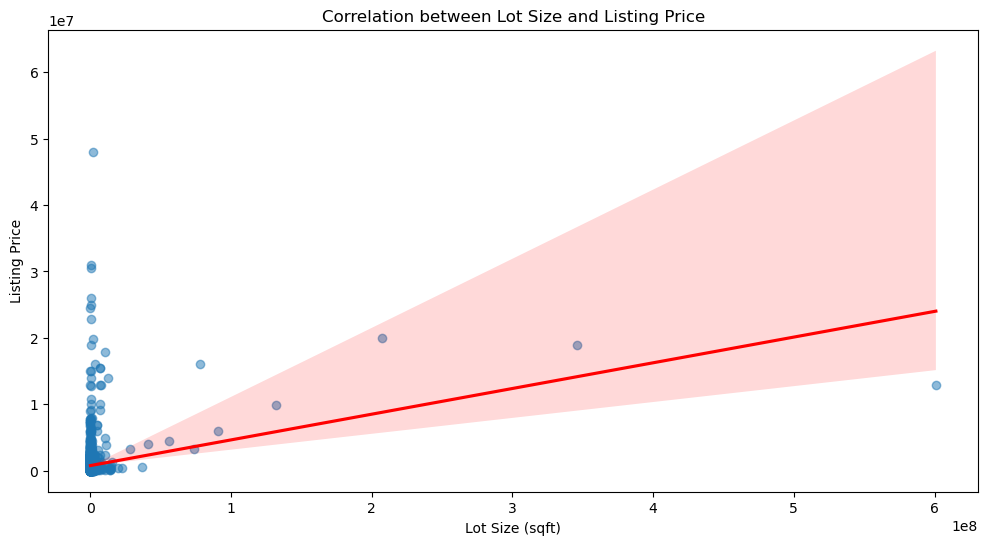

In [51]:
# Plotting a scatter plot to check for correlation with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=cleanedrs_data, x='lot_sqft', y='listPrice', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Correlation between Lot Size and Listing Price")
plt.xlabel("Lot Size (sqft)")
plt.ylabel("Listing Price")
plt.show()


A scatter plot with a regression line shows the correlation between lot size and listing price, indicating the direction and strength of the relationship.

In [52]:
# Calculate the correlation between lot size and listing price
correlation = cleanedrs_data['lot_sqft'].corr(cleanedrs_data['listPrice'])

#Print the correlation value
print("Correlation between Lot Size and Listing Price:", correlation)


Correlation between Lot Size and Listing Price: 0.25348910566332317


The scatter plot with a regression line shows a positive correlation between lot size and listing price, though it appears modest. The correlation coefficient of 0.25 indicates a weak but significant positive relationship, meaning larger lot sizes tend to command higher listing prices.


### Does Having a Garage Significantly Influence the Listing Price?

Hypotheses:

- Null Hypothesis (H0): The average listing price is not significantly different between properties with and without a garage.
- Alternate Hypothesis (H1): The average listing price is significantly different between properties with and without a garage.

**Test:** Since we’re comparing two groups (properties with garages and without), a t-test is appropriate.


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_89493/712502825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleanedrs_data, x='has_garage', y='listPrice', palette="Set2")


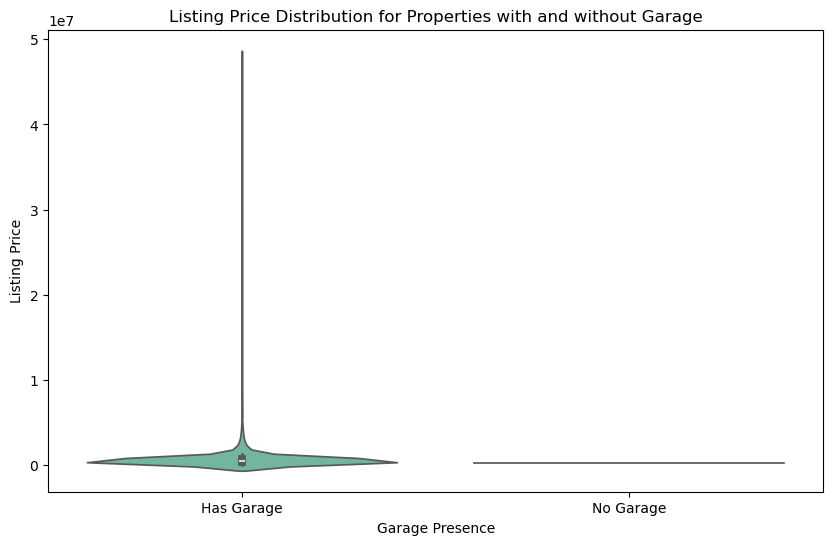

In [53]:
# Create a new column for 'Has Garage' based on the number of garage spaces
cleanedrs_data['has_garage'] = cleanedrs_data['garage'].apply(lambda x: 'Has Garage' if x > 0 else 'No Garage')

# Plotting Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=cleanedrs_data, x='has_garage', y='listPrice', palette="Set2")
plt.title("Listing Price Distribution for Properties with and without Garage")
plt.xlabel("Garage Presence")
plt.ylabel("Listing Price")
plt.show()


In [54]:
# Separate data into properties with garages and without garages
garage = cleanedrs_data[cleanedrs_data['garage'] == 1]['listPrice']
no_garage = cleanedrs_data[cleanedrs_data['garage'] == 0]['listPrice']

# Perform the t-test to compare average prices between properties with and without a garage
stat, p_value = ttest_ind(garage, no_garage)

#Results
print("T-test for Garage Presence and Listing Price:")
print("Statistic:", stat)
print("P-value:", p_value)


T-test for Garage Presence and Listing Price:
Statistic: 0.43911387665331897
P-value: 0.6609644734613036


The violin plot shows considerable overlap in listing prices between properties with and without garages, which is reflected in the non-significant t-test result (p-value = 0.66). This suggests that having a garage does not significantly impact the listing price.

### Is there a significant difference in prices across different property types?

Hypotheses:

- Null Hypothesis (H0): The average listing price does not significantly differ between different property types.
- Alternate Hypothesis (H1): The average listing price differs significantly between different property types.

**Test**: Since we're comparing mean prices across multiple groups an ANOVA test is the most appropriate.


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_89493/878149051.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=cleanedrs_data, x='type', y='listPrice', ci="sd", palette="coolwarm")
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_89493/878149051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleanedrs_data, x='type', y='listPrice', ci="sd", palette="coolwarm")


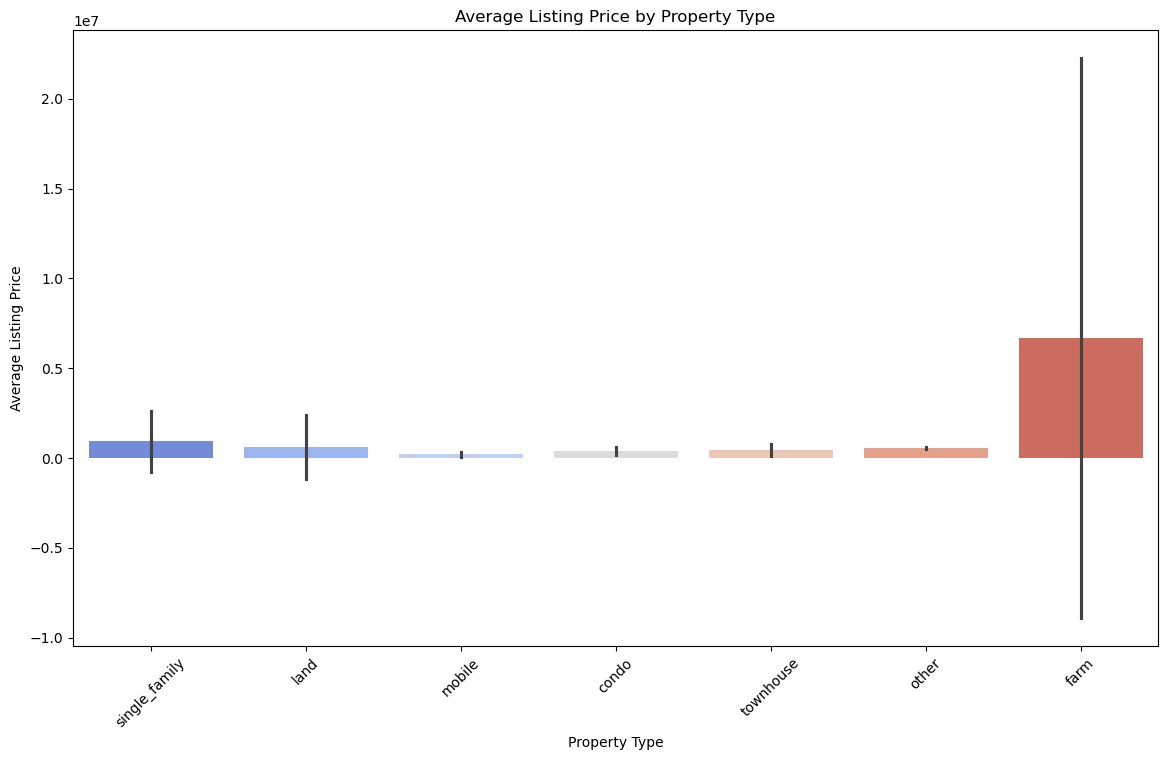

In [55]:
# Plotting Bar Plot with Error Bars
plt.figure(figsize=(14, 8))
sns.barplot(data=cleanedrs_data, x='type', y='listPrice', ci="sd", palette="coolwarm")
plt.title("Average Listing Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Listing Price")
plt.xticks(rotation=45)
plt.show()


In [56]:
# Group prices by property type
groups = [group["listPrice"].values for name, group in cleanedrs_data.groupby("type")]

# Perform the ANOVA test to see if property type impacts price
stat, p_value = f_oneway(*groups)

# Print the test statistic and p-value
print("ANOVA Test for Property Type and Listing Price:")
print("Statistic:", stat)
print("P-value:", p_value)


ANOVA Test for Property Type and Listing Price:
Statistic: 31.167720489995293
P-value: 6.9162416210156815e-37


The bar plot with error bars shows distinct variations in average listing prices across different property types. The ANOVA test yields a highly significant result (p-value = 6.92e-37), indicating that property type significantly influences listing price.

## Non-Technical Summary of Findings

1. Bedroom Count: The number of bedrooms significantly impacts property prices. Homes with more bedrooms tend to have higher prices, likely because they offer more space, which is generally more attractive to buyers.

2. Year Built: There is a notable price difference between properties built before 2000 and those built after. Newer homes seem to have higher values, possibly because they require less maintenance or have modern features that buyers want.

3. Lot Size: Although larger lots are somewhat more expensive, the impact of lot size on price is relatively weak. This suggests that factors other than lot size play a more important role in setting property prices.

4. Garage Presence: Surprisingly, having a garage does not significantly affect listing price. This means buyers are generally not willing to pay more just because a property has a garage.

5. Property Type: Different types of properties, like single-family homes, condos, and townhouses, have significantly different average prices. This reflects that buyers value these property types differently, possibly due to their unique features or the lifestyles they support.

These findings provide insights into what truly affects property values. While factors like the number of bedrooms, property age, and type have strong impacts on listing prices, others, like lot size and garage presence, seem less important. This information can be valuable for buyers, sellers, and real estate professionals in making informed decisions about property values and investments.